# Exploración y Análisis del Servicio de Taxis en Chicago: Impacto de las Condiciones Climáticas y Ubicaciones

## Introducción

Este proyecto de análisis de datos se centra en explorar y comprender el comportamiento de los servicios de taxi en Chicago, así como su relación con las condiciones climáticas y las ubicaciones de recogida y entrega de pasajeros. Utilizando conjuntos de datos proporcionados, se llevará a cabo un análisis exhaustivo que abarca desde la cantidad de viajes realizados por cada empresa de taxis en fechas específicas hasta la duración promedio de los viajes en diferentes condiciones climáticas y ubicaciones. A través de pasos cuidadosamente diseñados, se realizará una exploración detallada de los datos, se identificarán patrones y tendencias significativas, se probarán hipótesis relevantes y se sacarán conclusiones fundamentadas que proporcionen información valiosa para la toma de decisiones en el sector de transporte en Chicago.

## Diccionario de datos

El siguiente diccionario proporciona una descripción concisa de los datos contenidos en los archivos CSV /datasets/project_sql_result_01.csv , /datasets/project_sql_result_04.csv y/datasets/project_sql_result_07.csv . Estos conjuntos de datos contienen información relevante sobre las empresas de taxis, los destinos de los viajes en Chicago durante noviembre de 2017 y datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

**`/datasets/company_trips.csv:`** Contiene los siguientes datos:
- `'company_name:'` El nombre de la empresa de taxis.
- `'trips_amount:'` El número de viajes realizados por cada compañía de taxis el 15 y 16 de noviembre de 2017.

**`/datasets/trips_destinations.csv:`** Contiene los siguientes datos:
- `'dropoff_location_name:'` Los barrios de Chicago donde finalizaron los viajes.
- `'average_trips:'` El promedio de viajes que terminaron en cada barrio durante noviembre de 2017.

**`/datasets/loop_to_ohare_trips.csv:`** Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Estos son los valores de campo de la tabla:

- `start_ts:`fecha y hora de la recogida. 
- `weather_conditions:` condiciones climáticas en el momento en el que comenzó el viaje.
- `duration_seconds:` duración del viaje en segundos.

## Análisis exploratorio de datos

###  Análisis

1. Ahora haremos la importación de los archivos. Utilizaremos  Pandas para cargar los archivos CSV /datasets/project_sql_result_01.csv y /datasets/project_sql_result_04.csv en dataframes.

In [1]:
# importar librerías
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import levene, ttest_ind


In [2]:
# leer conjuntos de datos en los DataFrames

company_trips = pd.read_csv("./datasets/company_trips.csv")

trips_destinations = pd.read_csv("./datasets/trips_destinations.csv")

loop_to_ohare_trips = pd.read_csv('./datasets/loop_to_ohare_trips.csv')


2. Ahora estudiaremos los datos. Utilizaremos funciones como head(), info() y describe() para explorar los dataframes y comprender la estructura y el contenido de los datos y nos aseguraremos de que los tipos de datos sean correctos. Verificaremos que las columnas estén en los tipos de datos adecuados para el análisis. 

`company_trips: `

In [3]:
# Mostrar las primeras filas de company_trips
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Verificar duplicados en el DataFrame company_trips
company_trips.duplicated().sum()

np.int64(0)

In [5]:
# Mostrar los detalles de la tabla company_trips
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Generar un resumen estadístico del DataFrame company_trips
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


`trip_destinations:`

In [7]:
# Mostrar las primeras filas de trips_destinations
trips_destinations.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
# Verificar duplicados en el DataFrame trips_destinations
trips_destinations.duplicated().sum()

np.int64(0)

In [9]:
# Mostrar los detalles de la tabla trips_destinations
trips_destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# Generar un resumen estadístico del DataFrame trips_destinations
trips_destinations.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


4. Ahora identificaremos los 10 principales barrios en términos de finalización del recorrido. 

In [11]:
# Ordenar el DataFrame por average_trips en orden descendente y mostrar los 10 primeros
trips_destinations.sort_values(by=trips_destinations.columns[1], ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


`loop_to_ohare_trips`:

In [12]:
# Mostrar las primeras filas de loop_to_ohare_trips
loop_to_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
#Cambiar start_ts a datetime
loop_to_ohare_trips['start_ts'] = pd.to_datetime(loop_to_ohare_trips['start_ts'])

In [14]:
# Verificar duplicados en el DataFrame loop_to_ohare_trips
loop_to_ohare_trips.duplicated().sum()

np.int64(197)

In [15]:
# Eliminar duplicados del DataFrame loop_to_ohare_trips
loop_to_ohare_trips = loop_to_ohare_trips.drop_duplicates()

# Verificar nuevamente duplicados en el DataFrame loop_to_ohare_trips
loop_to_ohare_trips.duplicated().sum()

np.int64(0)

In [16]:
# Mostrar los detalles de la tabla loop_to_ohare_trips
loop_to_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


In [17]:
# Generar un resumen estadístico del DataFrame loop_to_ohare_trips
loop_to_ohare_trips.describe()

,start_ts,duration_seconds
count,871,871.000000
mean,2017-11-11 20:10:53.042479872,2096.308840
min,2017-11-04 00:00:00,0.000000
25%,2017-11-04 15:00:00,1440.000000
50%,2017-11-11 10:00:00,2015.000000
75%,2017-11-18 07:00:00,2584.000000
max,2017-11-25 23:00:00,7440.000000
std,NaN,782.274717


**Comentario**

Todo parece estar en orden con las tres tablas. Las columnas y tipos de datos parecen estar correctamente definidos, y no hay valores nulos en ninguna de las columnas. El único cambio realizado fue la conversión de las fechas de la columna 'start_ts' del DataFrame loop_to_ohare_trips al tipo datetime. En resumen, todo está bien con los DataFrames proporcionados.

5. Ahora haremos gráficos. Utilizaremos bibliotecas de visualización de datos como Matplotlib o Seaborn para crear gráficos que muestren la relación entre las empresas de taxis y el número de viajes, así como los 10 principales barrios por número de finalizaciones.

Text(0, 0.5, 'Número de Viajes')

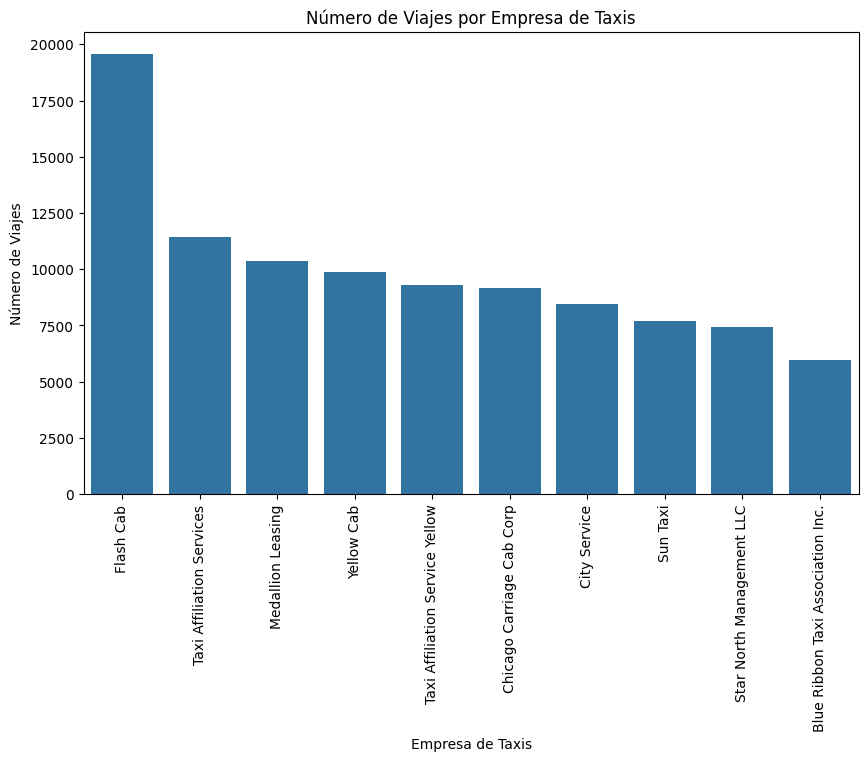

In [18]:
# Crear un gráfico de barras con las 10 compañías con más viajes

plt.figure(figsize=(10, 6))

sns.barplot(x='company_name', y='trips_amount', data=company_trips.head(10))

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
plt.title('Número de Viajes por Empresa de Taxis')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')

El gráfico de barras muestra el número de viajes de las principales compañías de taxis. Flash Cab lidera con una considerable ventaja, seguido por Taxi Affiliation Services y Medallion Leasing. Esta brecha indica una clara dominación de Flash Cab en el mercado de taxis local.

Text(0, 0.5, 'Promedio de viajes')

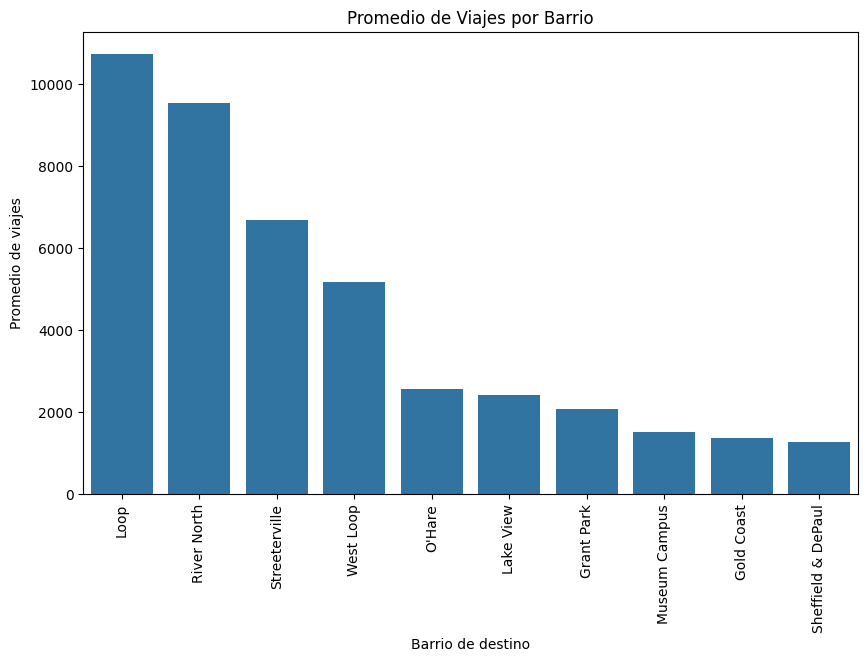

In [19]:
# Crear un gráfico de barras con los 10 principales barrios por número de finalizaciones

plt.figure(figsize=(10, 6))

sns.barplot(x='dropoff_location_name', y='average_trips', data=trips_destinations.head(10))

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
plt.title('Promedio de Viajes por Barrio')
plt.xlabel('Barrio de destino')
plt.ylabel('Promedio de viajes')


El gráfico de barras muestra el promedio de viajes que finalizaron en los 10 principales barrios de Chicago en noviembre de 2017. En la parte superior de la lista se encuentra el barrio "Loop", con un promedio de aproximadamente 10,727 viajes, seguido de cerca por "River North" con alrededor de 9,524 viajes en promedio. Estos dos barrios tienen los promedios más altos de finalizaciones de viajes, lo que sugiere una alta demanda de servicios de taxi en esas áreas. Por otro lado, "Sheffield & DePaul" ocupa el décimo lugar con un promedio de aproximadamente 1,260 viajes, indicando una menor actividad de taxi en comparación con los otros barrios listados.

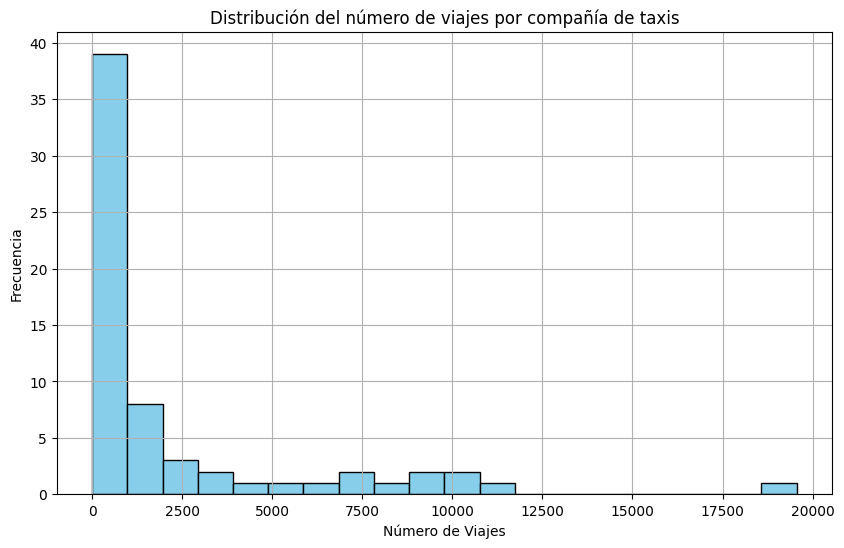

In [20]:
# Crear el histograma de viajes por compañia de taxis
plt.figure(figsize=(10, 6))
plt.hist(company_trips['trips_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del número de viajes por compañía de taxis')
plt.xlabel('Número de Viajes')
plt.ylabel('Frecuencia')
plt.grid(True)

**Forma de la distribución:** El histograma muestra una distribución sesgada hacia la izquierda, lo que significa que la mayor parte de las compañías de taxis tienen un número relativamente bajo de viajes. Esto se refleja en la mayor frecuencia de observaciones en el rango de 0 a 100 viajes, mientras que las frecuencias disminuyen a medida que aumenta el número de viajes.

**Concentración de datos:** La mayoría de las compañías de taxis tienen un número de viajes que caen en el rango de 0 a 100, como se evidencia por la frecuencia más alta en este rango. Además, la frecuencia disminuye significativamente a medida que nos movemos hacia rangos de viajes más altos, con frecuencias inferiores a 5 en esos rangos.

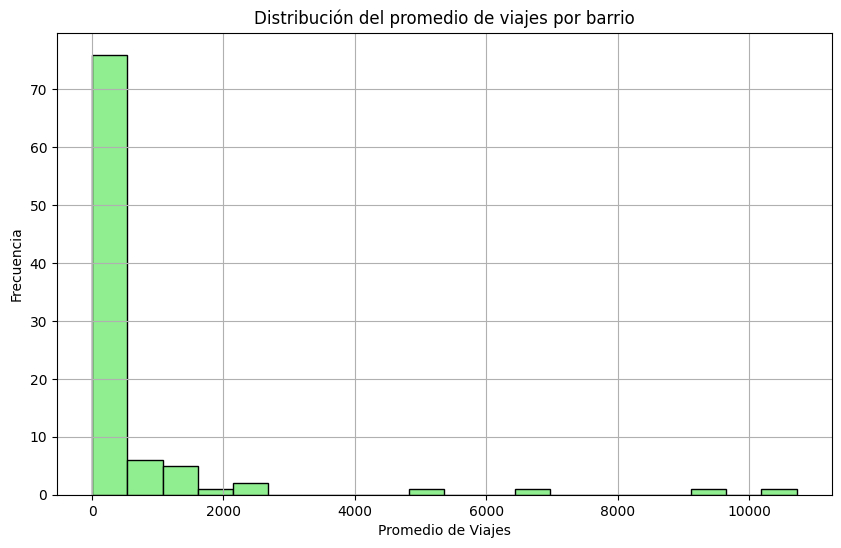

In [21]:
# Crear el histograma de promedio de viajes por barrio
plt.figure(figsize=(10, 6))
plt.hist(trips_destinations['average_trips'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución del promedio de viajes por barrio')
plt.xlabel('Promedio de Viajes')
plt.ylabel('Frecuencia')
plt.grid(True)

**Forma de la distribución:** El histograma muestra una distribución sesgada hacia la izquierda, ya que la mayor frecuencia de observaciones se encuentra en el rango de 0 a 500 en el eje x. Esto indica que la mayoría de los barrios tienen un promedio de viajes relativamente bajo.

**Barrios más populares:** La mayoría de los barrios tienen un promedio de viajes que cae en el rango de 0 a 500, lo que sugiere que estos barrios tienen una menor actividad de taxi en comparación con otros. Los rangos de promedio de viajes más altos tienen frecuencias significativamente más bajas, lo que indica que hay menos barrios con promedios de viajes más altos.

6. Finalmente, sacaremos conclusiones. Basándonos en los gráficos generados, interpretaremos los resultados y extraeremos conclusiones sobre los patrones y tendencias observados en los datos.

### Conclusiones

**Gráfico de barras del número de viajes por compañía de taxis:**
Flash Cab lidera con una considerable ventaja en términos del número de viajes, seguido por Taxi Affiliation Services y Medallion Leasing.

Esta brecha indica una clara dominación de Flash Cab en el mercado de taxis local, con algunas compañías que tienen números de viajes mucho más altos que otras.

**Gráfico de barras de los 10 principales barrios por promedio de viajes:**

Los barrios "Loop" y "River North" tienen los promedios más altos de finalizaciones de viajes, lo que sugiere una alta demanda de servicios de taxi en esas áreas.

Barrios como "Sheffield & DePaul" muestran una actividad de taxi más baja en comparación con otros barrios listados, con un promedio de viajes considerablemente más bajo.

**Histograma del número de viajes por compañía de taxis:**

La distribución del número de viajes por compañía de taxis está sesgada hacia la izquierda, lo que sugiere que la mayoría de las compañías de taxis tienen un número relativamente bajo de viajes.

Hay una concentración de compañías de taxis con un número de viajes más bajo, mientras que solo unas pocas compañías tienen números de viajes significativamente más altos.


**Histograma del promedio de viajes por barrio:**

La mayoría de los barrios tienen un promedio de viajes relativamente bajo, concentrándose en el rango de 0 a 500 viajes.

Los barrios con promedios de viajes más altos son menos comunes, indicando que hay una menor actividad de taxi en esos barrios en comparación con los de menor promedio de viajes.


## Prueba de hipótesis

1. Ahora plantearémos las hipótesis. 

**La hipótesis nula (H0)** será que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos. 

**La hipótesis alternativa (H1)** será que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia en los sábados lluviosos.

In [22]:
#Mostrar el DataFrame
loop_to_ohare_trips

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


2. Ahora establecerémos el nivel de significación. Decidiremos un valor alfa para el nivel de significación, que es el umbral para rechazar la hipótesis nula. 

**Alfa = 0.05**

3. Ahora probaremos las hipótesis. Utilizaremos técnicas estadísticas, como pruebas t, para comparar la duración promedio de los viajes en días lluviosos con la duración promedio en otros días de la semana. Primero, realizamos la prueba de Levene para verificar si las varianzas son iguales entre las muestras de días lluviosos y no lluviosos. Luego, calcularemos el valor p para determinar si hay evidencia suficiente para rechazar la hipótesis nula y concluir si la duración promedio de los viajes cambia significativamente en los sábados lluviosos en comparación con otros sábados.

In [23]:
# Crear la columna 'weekday' que contiene el día de la semana 
loop_to_ohare_trips['weekday'] = loop_to_ohare_trips['start_ts'].dt.weekday

# Filtrar los viajes en sábados lluviosos
saturdays_rainy = loop_to_ohare_trips[(loop_to_ohare_trips['weekday'] == 5) & (loop_to_ohare_trips['weather_conditions'] == 'Bad')]

# Filtrar los viajes en sábados no lluviosos
saturdays_not_rainy = loop_to_ohare_trips[(loop_to_ohare_trips['weekday'] == 5) & (loop_to_ohare_trips['weather_conditions'] != 'Bad')]

# Realizar la prueba de Levene para verificar si las varianzas son iguales
statistic, p_value_levene = levene(saturdays_rainy['duration_seconds'], saturdays_not_rainy['duration_seconds'])

# Imprimir el resultado de la prueba de Levene
print("Estadístico de prueba de Levene:", statistic)
print("Valor p de la prueba de Levene:", p_value_levene)

# Interpretar el resultado de la prueba de Levene
if p_value_levene < 0.05:
    print("Las varianzas son diferentes.")
    equal_var = False
else:
    print("Las varianzas son iguales.")
    equal_var = True

Estadístico de prueba de Levene: 0.000586951625283602
Valor p de la prueba de Levene: 0.9806770360671218
Las varianzas son iguales.


In [24]:
# Realizar la prueba t de Student para comparar las duraciones de los viajes en sábados lluviosos y otros días
t_statistic, p_value = ttest_ind(saturdays_rainy['duration_seconds'], saturdays_not_rainy['duration_seconds'], equal_var=True)

# Imprimir el resultado de la prueba
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Comparar el valor p con el nivel de significancia (alpha)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para concluir que la duración promedio de los viajes sí cambia en los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para concluir que la duración promedio de los viajes cambia en los sábados lluviosos.")

Estadístico t: 5.427957689754561
Valor p: 7.397770692813658e-08
Rechazamos la hipótesis nula: hay evidencia suficiente para concluir que la duración promedio de los viajes sí cambia en los sábados lluviosos.


4. Finalmente, explicaremos los resultados. Interpretaremos los resultados de la prueba de hipótesis, explicando si hay evidencia suficiente para rechazar la hipótesis nula y qué implicaciones tienen estos resultados en relación con la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos.

Con un valor p muy bajo de 7.397770692813604e-08, casi cero, hay evidencia suficiente para rechazar la hipótesis nula. Esto indica que, en días lluviosos, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare realmente varía.

Esto tiene implicaciones significativas, especialmente para el sector del transporte en Chicago. Si las condiciones climáticas afectan la duración de los viajes, es crucial ajustar la planificación y asignación de recursos en consecuencia. Podríamos necesitar más vehículos disponibles o considerar reorganizar las rutas para optimizar el tiempo de viaje en días lluviosos. Esta información es valiosa para mejorar la eficiencia y la satisfacción del cliente en el servicio de taxis.

## Conclusiones generales

En resumen, este proyecto de análisis de datos sobre el comportamiento de los servicios de taxi en Chicago revela importantes hallazgos:

1. Se identificó que Flash Cab lidera el mercado de taxis local, seguido por Taxi Affiliation Services y Medallion Leasing, lo que sugiere una clara dominación de Flash Cab.

2. Los barrios "Loop" y "River North" tienen una alta demanda de servicios de taxi, mientras que barrios como "Sheffield & DePaul" muestran una actividad más baja.

3. La distribución del número de viajes por compañía de taxis está sesgada hacia la izquierda, lo que indica que la mayoría de las compañías tienen un número relativamente bajo de viajes.

4. En cuanto a la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos, la prueba de hipótesis reveló que hay una variación significativa. Esto sugiere que las condiciones climáticas tienen un impacto en la duración de los viajes, lo que podría requerir ajustes en la planificación y asignación de recursos en el sector del transporte en Chicago.

Estos hallazgos proporcionan información valiosa para la toma de decisiones en el sector del transporte en Chicago, lo que podría mejorar la eficiencia y la satisfacción del cliente en el servicio de taxis.